In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math

In [10]:
pd.set_option('display.max_rows', 500)

In [11]:
all_data = pd.read_csv('owid-covid-data.csv')
dataset = df = all_data[all_data['continent'].notna()]
dataset.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 

In [12]:
dataset = dataset[[
    'date',
    'total_cases', 
    'new_cases_smoothed', 
    'total_deaths', 
    'new_deaths_smoothed', 
    'reproduction_rate',
    'new_tests_smoothed', 
    'positive_rate',
    'total_vaccinations', 
    'people_vaccinated', 
    'new_vaccinations', 
    'new_vaccinations_smoothed',
    'stringency_index',
    'population', 
    'aged_70_older', 
    'gdp_per_capita', 
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence', 
    'female_smokers',
    'male_smokers', 
    'handwashing_facilities', 
    'hospital_beds_per_thousand',
    'life_expectancy', 
    'human_development_index'
]]

dataset.shape

(122041, 25)

In [13]:
dataset.dtypes

date                           object
total_cases                   float64
new_cases_smoothed            float64
total_deaths                  float64
new_deaths_smoothed           float64
reproduction_rate             float64
new_tests_smoothed            float64
positive_rate                 float64
total_vaccinations            float64
people_vaccinated             float64
new_vaccinations              float64
new_vaccinations_smoothed     float64
stringency_index              float64
population                    float64
aged_70_older                 float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
life_expectancy               float64
human_development_index       float64
dtype: object

In [18]:
dataset['date'] = pd.to_datetime(dataset['date'])

C:\Users\User\AppData\Local\Temp/ipykernel_16532/3931207493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'])


In [19]:
def get_bins(n):
    return int(1 + 3.3 * math.log(n))

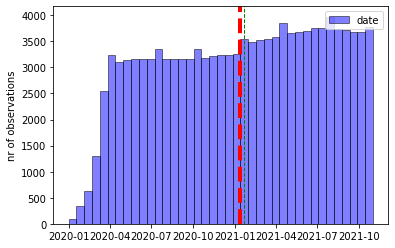

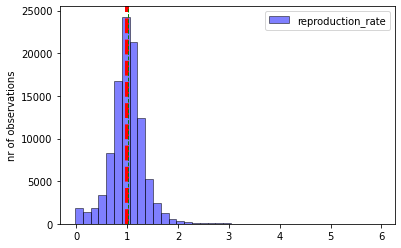

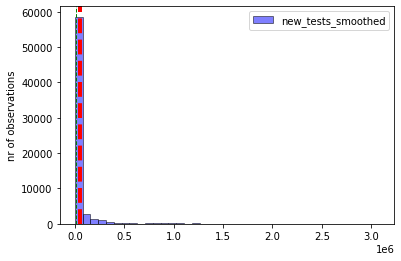

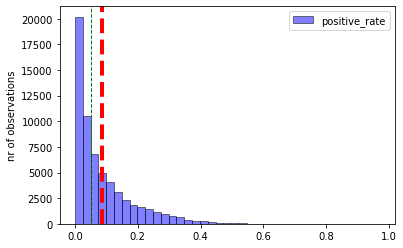

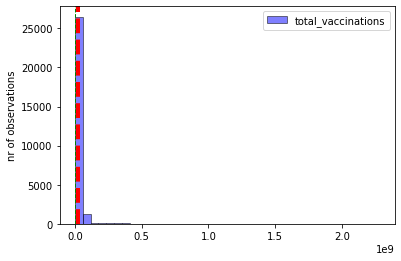

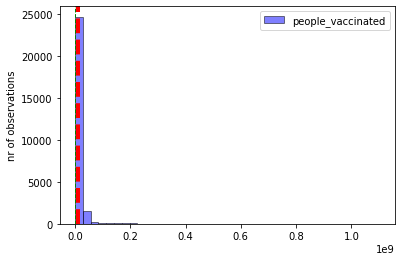

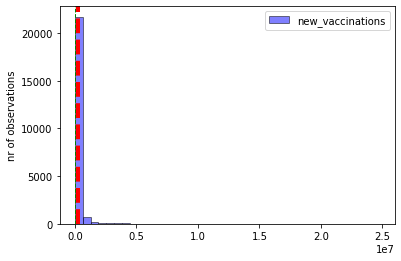

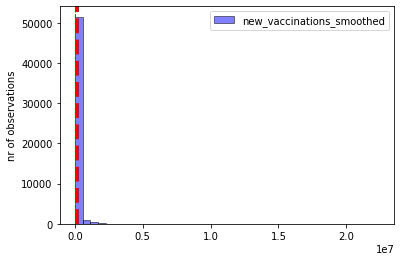

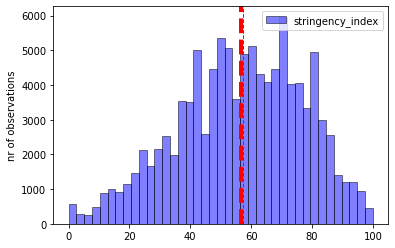

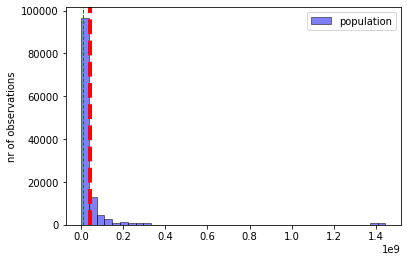

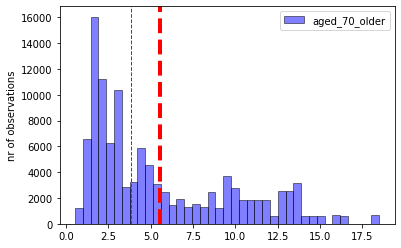

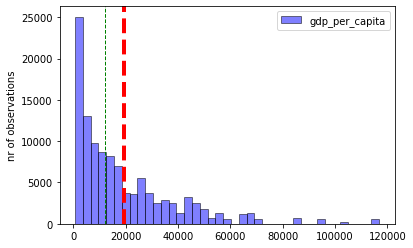

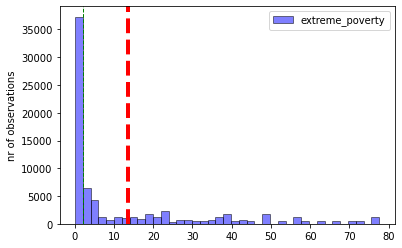

In [20]:
dataset_size = dataset.shape[0]
bins = get_bins(dataset_size)
without = [
    'total_cases', 
    'new_cases_smoothed', 
    'total_deaths', 
    'new_deaths_smoothed',
    'cardiovasc_death_rate',
    'diabetes_prevalence', 
    'female_smokers',
    'male_smokers', 
    'handwashing_facilities', 
    'hospital_beds_per_thousand',
    'life_expectancy', 
    'human_development_index']
for column in dataset.columns:
    if column in without:
        continue
    plt.hist(dataset[column], bins=bins, alpha=0.5, label=column, color='blue', edgecolor='black')
    plt.axvline(dataset[column].mean(), color ='red', linewidth = 4, linestyle = 'dashed')
    plt.axvline(dataset[column].median(), color ='green', linewidth = 1, linestyle = 'dashed')
    plt.legend(loc='upper right')
    plt.ylabel('nr of observations')
    plt.show()

total_cases                      AxesSubplot(0.125,0.749828;0.133621x0.130172)
new_cases_smoothed            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
total_deaths                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
new_deaths_smoothed           AxesSubplot(0.606034,0.749828;0.133621x0.130172)
reproduction_rate             AxesSubplot(0.766379,0.749828;0.133621x0.130172)
new_tests_smoothed               AxesSubplot(0.125,0.593621;0.133621x0.130172)
positive_rate                 AxesSubplot(0.285345,0.593621;0.133621x0.130172)
total_vaccinations             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
people_vaccinated             AxesSubplot(0.606034,0.593621;0.133621x0.130172)
new_vaccinations              AxesSubplot(0.766379,0.593621;0.133621x0.130172)
new_vaccinations_smoothed        AxesSubplot(0.125,0.437414;0.133621x0.130172)
stringency_index              AxesSubplot(0.285345,0.437414;0.133621x0.130172)
population                     AxesSubplot(0.44569,0

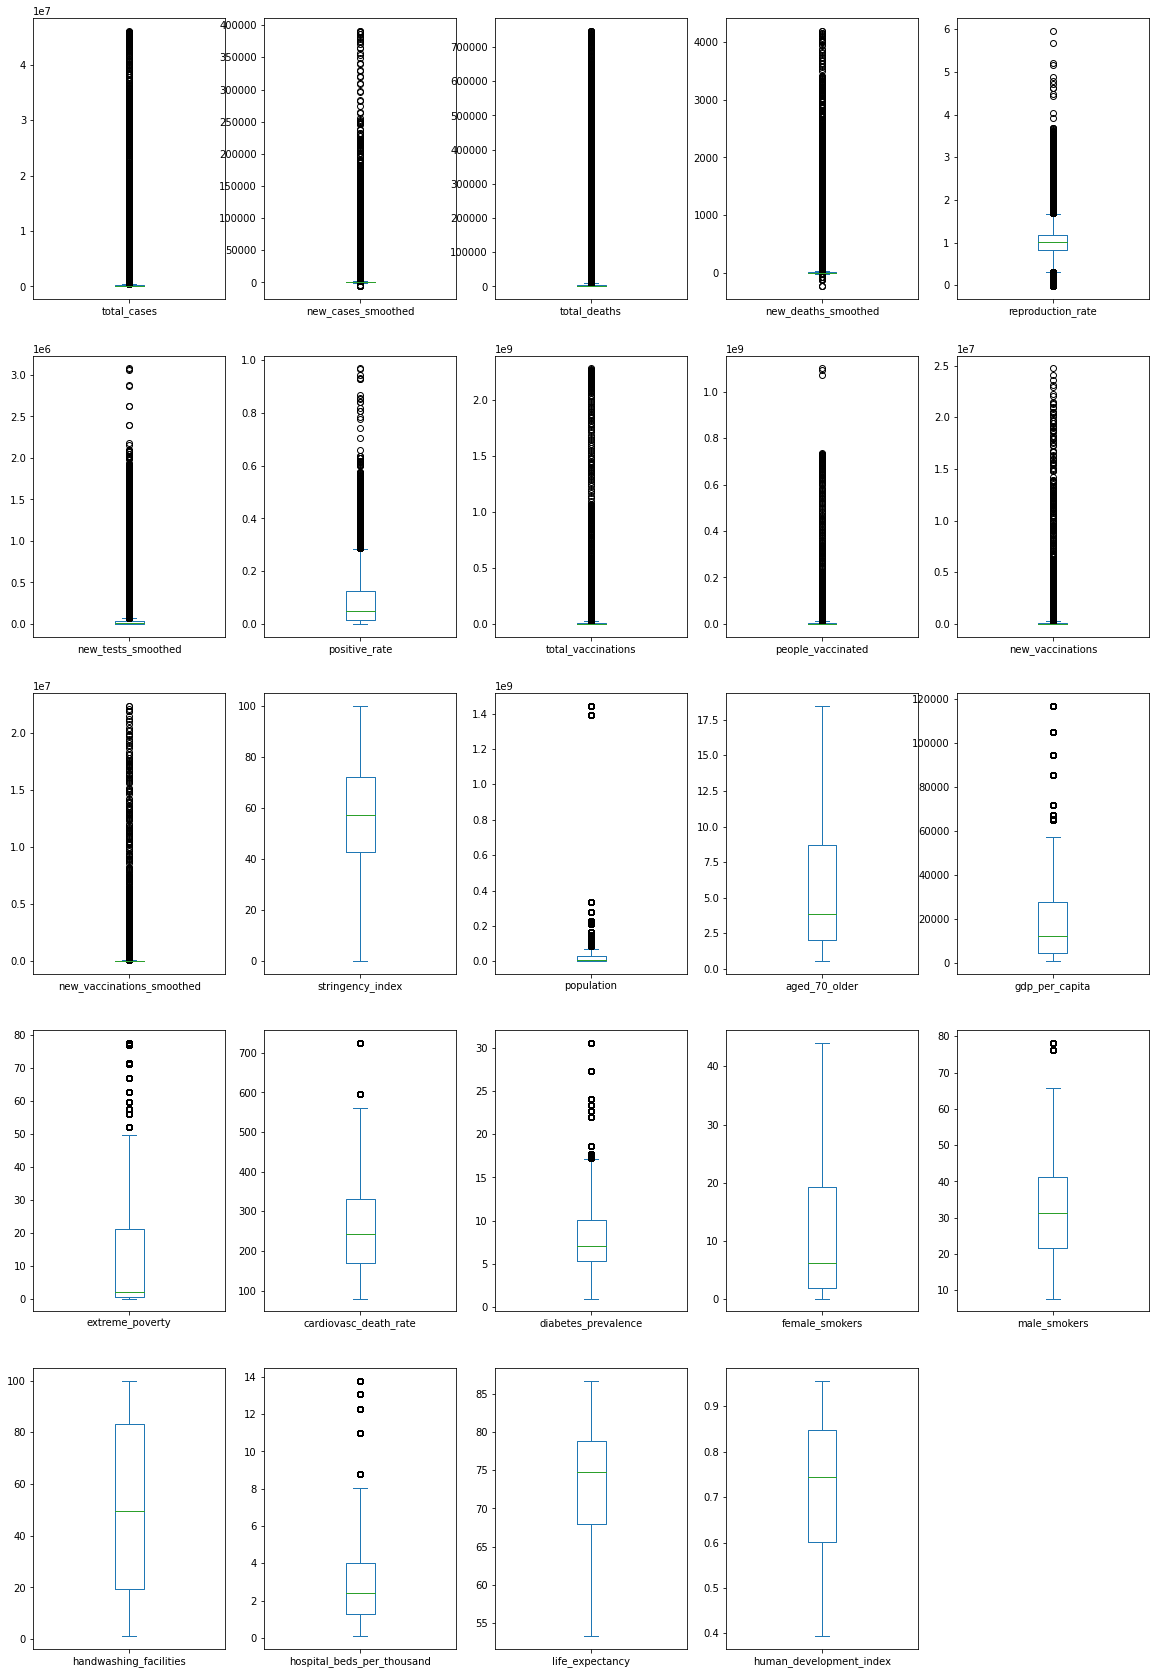

In [28]:
dataset.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 30))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


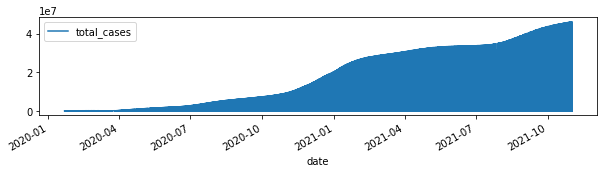

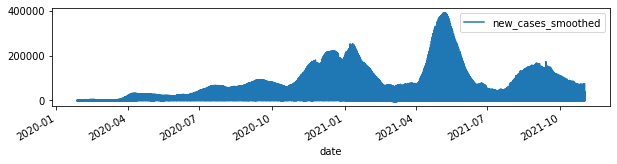

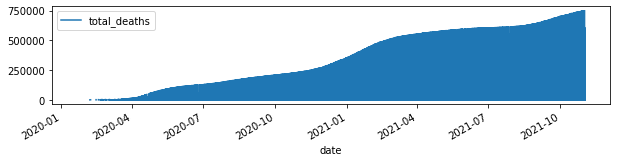

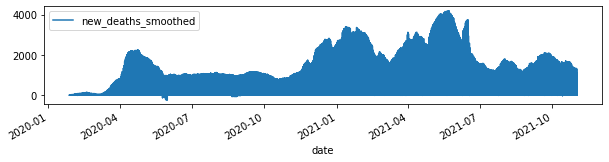

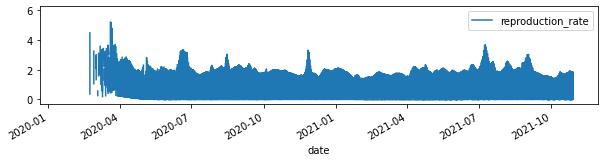

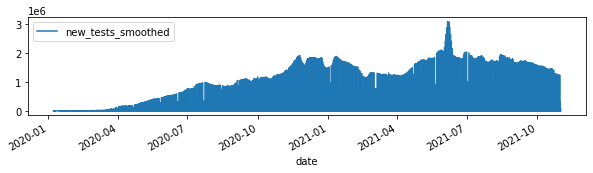

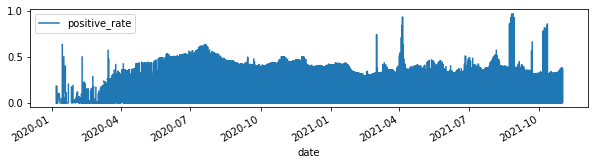

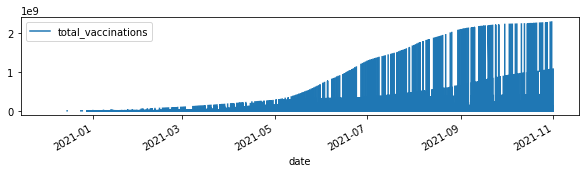

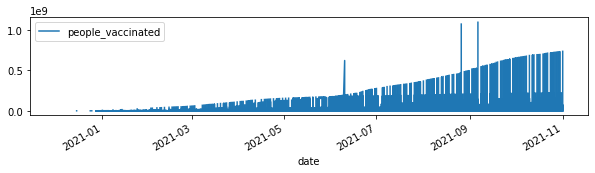

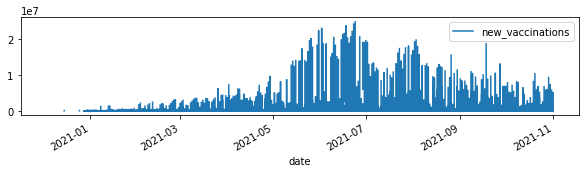

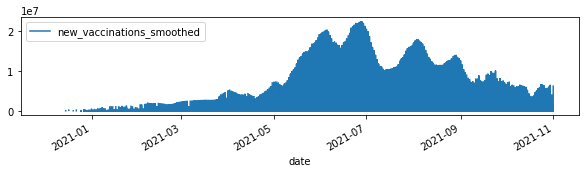

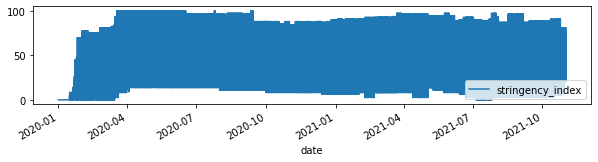

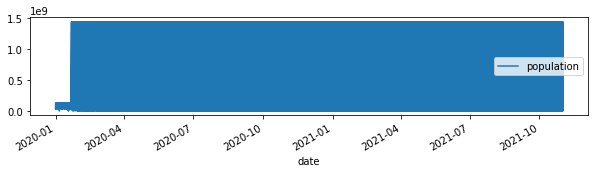

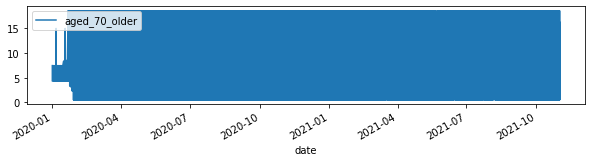

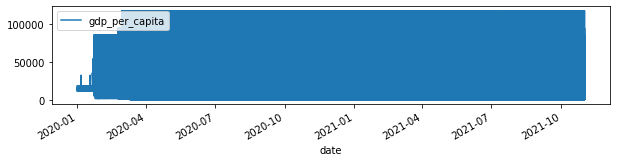

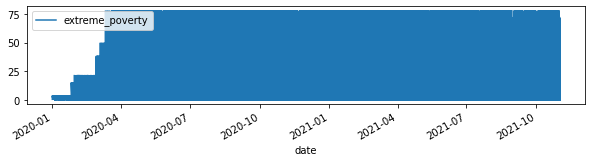

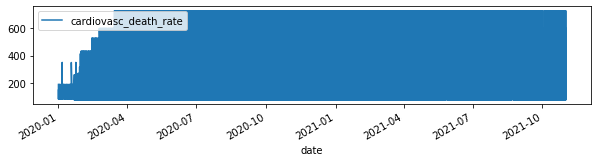

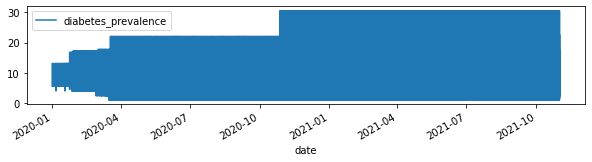

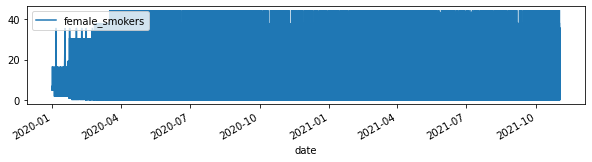

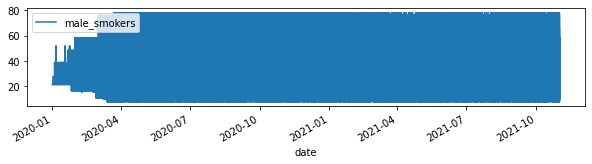

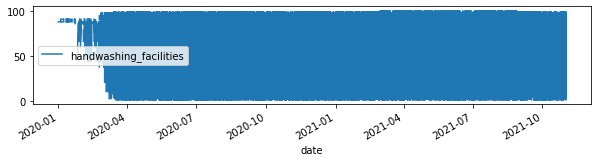

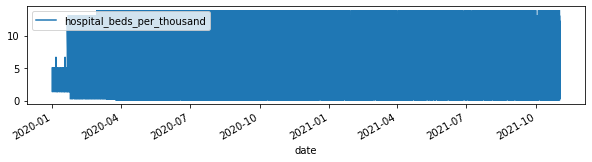

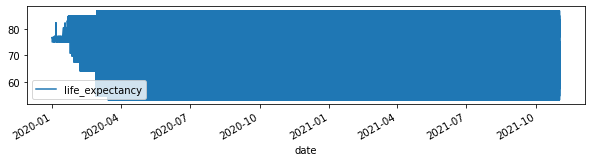

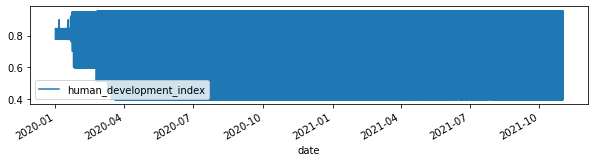

In [29]:
def plot_data_in_time():
    for column in dataset.columns:
        if column in ['date']:
            continue
        dataset.plot(kind='line', x='date', y=column, figsize=(10, 2))

plot_data_in_time()